In [1]:
import joblib
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Read data in the excel file
data = pd.read_csv(r"H:\Alzhiemar Model\oasis_longitudinal.csv")
data.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [3]:
data.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [5]:
columns = ['Subject ID', 'MRI ID']
data.drop(columns = columns, axis = 1, inplace = True)

In [6]:
data

,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [7]:
# Drop rows with any NaN values
data.dropna(inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354 entries, 0 to 372
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Group     354 non-null    object 
 1   Visit     354 non-null    int64  
 2   MR Delay  354 non-null    int64  
 3   M/F       354 non-null    object 
 4   Hand      354 non-null    object 
 5   Age       354 non-null    int64  
 6   EDUC      354 non-null    int64  
 7   SES       354 non-null    float64
 8   MMSE      354 non-null    float64
 9   CDR       354 non-null    float64
 10  eTIV      354 non-null    int64  
 11  nWBV      354 non-null    float64
 12  ASF       354 non-null    float64
dtypes: float64(5), int64(5), object(3)
memory usage: 38.7+ KB


In [9]:
data["M/F"].value_counts()

F    204
M    150
Name: M/F, dtype: int64

In [10]:
data["Hand"].value_counts()

R    354
Name: Hand, dtype: int64

In [11]:
columns = ['Hand']
data.drop(columns = columns, axis = 1, inplace = True)

In [12]:
data

,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,1,0,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,2,457,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
5,Nondemented,1,0,F,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,Nondemented,2,538,F,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,Nondemented,1,0,M,80,12,4.0,28.0,0.0,1689,0.712,1.039
...,...,...,...,...,...,...,...,...,...,...,...,...
368,Demented,2,842,M,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,Demented,3,2297,M,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,Nondemented,1,0,F,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,Nondemented,2,763,F,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [13]:
# Define the mapping of values to be replaced
mapping = {'Converted': 'Demented'}

# Replace values in a specific column using the mapping
data['Group'] = data['Group'].replace(mapping)

In [14]:
data['Group'].value_counts()

Nondemented    190
Demented       164
Name: Group, dtype: int64

In [15]:
group_dict = {"Nondemented":0, "Demented":1} 

data["Group"] = data["Group"].map(group_dict)

In [16]:
group_dict = {"M":0, "F":1} 

data["M/F"] = data["M/F"].map(group_dict)

In [17]:
data

,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,1,0,0,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,0,2,457,0,88,14,2.0,30.0,0.0,2004,0.681,0.876
5,0,1,0,1,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,0,2,538,1,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,0,1,0,0,80,12,4.0,28.0,0.0,1689,0.712,1.039
...,...,...,...,...,...,...,...,...,...,...,...,...
368,1,2,842,0,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,1,3,2297,0,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,0,1,0,1,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,0,2,763,1,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [18]:
columns = ['Visit', 'MR Delay']
data.drop(columns = columns, axis = 1, inplace = True)

In [19]:
corr = data.corr()
corr

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
Group,1.000000,-0.223649,-0.003311,-0.163307,0.062463,-0.527441,0.773560,-0.033780,-0.313929,0.021401
M/F,-0.223649,1.000000,0.027910,-0.089937,0.045776,0.159501,-0.205822,-0.571443,0.241709,0.560791
Age,-0.003311,0.027910,1.000000,-0.024977,-0.046857,0.055880,-0.022759,0.040182,-0.526316,-0.031783
EDUC,-0.163307,-0.089937,-0.024977,1.000000,-0.722647,0.184459,-0.129440,0.267933,-0.019822,-0.251677
SES,0.062463,0.045776,-0.046857,-0.722647,1.000000,-0.149219,0.076160,-0.261575,0.090095,0.255576
MMSE,-0.527441,0.159501,0.055880,0.184459,-0.149219,1.000000,-0.705962,-0.019439,0.341381,0.027745
CDR,0.773560,-0.205822,-0.022759,-0.129440,0.076160,-0.705962,1.000000,0.052361,-0.350086,-0.063413
eTIV,-0.033780,-0.571443,0.040182,0.267933,-0.261575,-0.019439,0.052361,1.000000,-0.206668,-0.989030
nWBV,-0.313929,0.241709,-0.526316,-0.019822,0.090095,0.341381,-0.350086,-0.206668,1.000000,0.211150
ASF,0.021401,0.560791,-0.031783,-0.251677,0.255576,0.027745,-0.063413,-0.989030,0.211150,1.000000


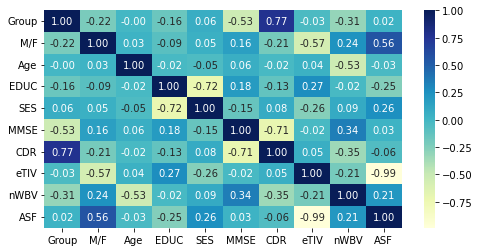

In [20]:
plt.figure(figsize = (8, 4))
sns.heatmap(data=corr, annot=True, cmap="YlGnBu", fmt='.2f')
plt.show()

In [21]:
x = data.drop('Group', axis=1)
y = data['Group']

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [23]:
models = {'LR' : LogisticRegression(random_state=42),
          'svm' : SVC(random_state=42), 
          'DT' : DecisionTreeClassifier(random_state=42), 
          'RF' : RandomForestClassifier(random_state=42), 
          'XGB' : XGBClassifier(random_state=42), 
          'KNN' : KNeighborsClassifier()}

In [24]:
for name, model in models.items() :
    print(name)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    print('Train Score', accuracy_score(y_train, model.predict(x_train)))
    print('Validation Score', accuracy_score(y_test, y_pred))
    print('Finished')
    print(50*("-"))

LR
Train Score 0.9469964664310954
Validation Score 0.9295774647887324
Finished
--------------------------------------------------
svm
Train Score 0.5406360424028268
Validation Score 0.5211267605633803
Finished
--------------------------------------------------
DT
Train Score 1.0
Validation Score 0.9014084507042254
Finished
--------------------------------------------------
RF


C:\Users\Ahmed\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train Score 1.0
Validation Score 0.9436619718309859
Finished
--------------------------------------------------
XGB
Train Score 1.0
Validation Score 0.9154929577464789
Finished
--------------------------------------------------
KNN
Train Score 0.8374558303886925
Validation Score 0.647887323943662
Finished
--------------------------------------------------


In [25]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Create Random Forest classifier
RF = RandomForestClassifier(random_state=42)

# Perform grid search
grid_search = GridSearchCV(estimator=RF, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)  # X_train and y_train are your training data

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Use the best model for prediction
best_model = grid_search.best_estimator_
predictions = best_model.predict(x_test)  # X_test is your test data

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.950689223057644


In [26]:
# Assuming y_test and predictions are your true labels and predicted labels respectively
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95        37
           1       0.97      0.91      0.94        34

    accuracy                           0.94        71
   macro avg       0.95      0.94      0.94        71
weighted avg       0.94      0.94      0.94        71



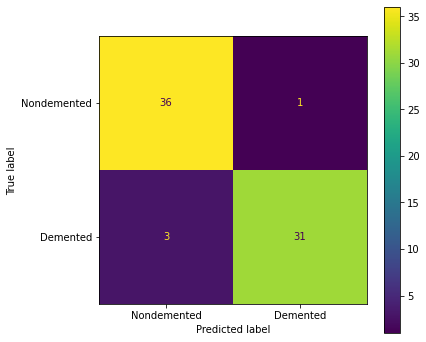

In [27]:
# Assuming you already have 'y_test', 'y_pred', 'model.classes_'
cm = confusion_matrix(y_test, predictions, labels=model.classes_)

# Define your true label names
true_label_names = ['Nondemented', 'Demented']  # Replace these with your actual label names

# Adjust the figure size using figsize
fig, ax = plt.subplots(figsize=(6, 6))

# Create ConfusionMatrixDisplay with display_labels parameter
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=true_label_names)
disp.plot(ax=ax)

# Show the plot
plt.show()

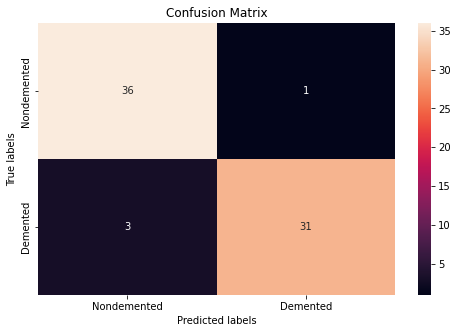

In [28]:
# Adjust the figure size using figsize
fig, ax = plt.subplots(figsize=(8, 5))

# Adjust the heatmap size and annotation font size
sns.heatmap(cm, annot=True, fmt='g', ax=ax, annot_kws={"size": 10})

# Set labels and title
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

# # Set tick labels
ax.xaxis.set_ticklabels(['Nondemented', 'Demented'] )
ax.yaxis.set_ticklabels(['Nondemented', 'Demented'] )

# Show the plot
plt.show()

In [29]:
joblib.dump(grid_search, r"H:\Alzhiemar Model\model\Alzheimer's Disease Model.h5")

["H:\\Alzhiemar Model\\model\\Alzheimer's Disease Model.h5"]